# Sport Image Classification (Using Convolutional Neural Network)

Collection of 100 different sport images. Total of 13572 samples. The classes are nearly balanced, number of samples for each class varies ~100-170

### Importing Libraries

In [1]:
import numpy as np
import os
from keras import layers
from keras import models
from keras import optimizers
from keras import metrics
import tensorflow as tf 
import matplotlib.pyplot as plt

### Getting image directories for train and validation sets

In [2]:
train_directory = '../../Data/TrainSet'
valid_directory = '../../Data/ValidSet'

In [3]:
train_directory

'../../Data/TrainSet'

In [4]:
for folder in os.listdir(train_directory):
    print(folder + ' -> ' + str(len([name for name in os.listdir('../../Data/TrainSet/'+str(folder))])))

air hockey -> 112
ampute football -> 112
archery -> 132
arm wrestling -> 99
axe throwing -> 113
balance beam -> 152
barell racing -> 123
baseball -> 174
basketball -> 169
baton twirling -> 108
bike polo -> 111
billiards -> 145
bmx -> 140
bobsled -> 138
bowling -> 120
boxing -> 116
bull riding -> 149
bungee jumping -> 125
canoe slamon -> 164
cheerleading -> 132
chuckwagon racing -> 120
cricket -> 130
croquet -> 136
curling -> 141
disc golf -> 123
fencing -> 135
field hockey -> 158
figure skating men -> 146
figure skating pairs -> 151
figure skating women -> 159
fly fishing -> 134
football -> 191
formula 1 racing -> 191
frisbee -> 133
gaga -> 118
giant slalom -> 151
golf -> 157
hammer throw -> 122
hang gliding -> 122
harness racing -> 147
high jump -> 159
hockey -> 172
horse jumping -> 137
horse racing -> 139
horseshoe pitching -> 102
hurdles -> 137
hydroplane racing -> 108
ice climbing -> 130
ice yachting -> 112
jai alai -> 132
javelin -> 136
jousting -> 118
judo -> 150
lacrosse -> 151


# Creating the model

### Initial run

An initial run with 13 layers (5 Convolutional layers, 5 Pooling, 2 Fully Connected Layers and 1 Output Layer)



In [5]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation = 'relu', padding="same", input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(8, (3,3), activation = 'relu', padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16, (3,3), activation = 'relu', padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(16, (3,3), activation = 'relu',padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation = 'relu',padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(100,activation = 'softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 8)       584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 16)        1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 16)       0

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-3),metrics=metrics.metrics.categorical_accuracy)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Data Preprocessing

#### Reading Images

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, horizontal_flip=True, shear_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid_directory,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [11]:
import pickle

In [12]:
for data_batch, label_batch in train_generator:
    print('databatch shape:', data_batch.shape)
    print('labelbatch shape:',label_batch.shape)
    break

databatch shape: (64, 224, 224, 3)
labelbatch shape: (64, 100)


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 212,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 15
)

<ipython-input-13-47981f44430c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
212/212 [==============================] - 265s 1s/step - loss: 4.3233 - categorical_accuracy: 0.0447 - val_loss: 4.0788 - val_categorical_accuracy: 0.0708
Epoch 2/100
212/212 [==============================] - 262s 1s/step - loss: 3.7984 - categorical_accuracy: 0.1068 - val_loss: 3.6913 - val_categorical_accuracy: 0.1271
Epoch 3/100
212/212 [==============================] - 261s 1s/step - loss: 3.5348 - categorical_accuracy: 0.1504 - val_loss: 3.3768 - val_categorical_accuracy: 0.1896
Epoch 4/100
212/212 [==============================] - 261s 1s/step - loss: 3.3404 - categorical_accuracy: 0.1930 - val_loss: 3.2201 - val_categorical_accuracy: 0.2125
Epoch 5/100
212/212 [==============================] - 262s 1s/step - loss: 3.1960 - categorical_accuracy: 0.2168 - val_loss: 3.0501 - val_categorical_accuracy: 0.2792
Epoch 6/100
212/212 [==============================] - 262s 1s/step - loss: 3.0803 - categorical_accuracy: 0.2376 - val_loss: 3.2599 - val_categorical_accuracy:

212/212 [==============================] - 262s 1s/step - loss: 1.6547 - categorical_accuracy: 0.5497 - val_loss: 1.7962 - val_categorical_accuracy: 0.5354
Epoch 50/100
212/212 [==============================] - 262s 1s/step - loss: 1.6721 - categorical_accuracy: 0.5398 - val_loss: 1.6353 - val_categorical_accuracy: 0.5542
Epoch 51/100
212/212 [==============================] - 261s 1s/step - loss: 1.6621 - categorical_accuracy: 0.5414 - val_loss: 1.7326 - val_categorical_accuracy: 0.5437
Epoch 52/100
212/212 [==============================] - 261s 1s/step - loss: 1.6290 - categorical_accuracy: 0.5527 - val_loss: 2.1671 - val_categorical_accuracy: 0.4833
Epoch 53/100
212/212 [==============================] - 263s 1s/step - loss: 1.6461 - categorical_accuracy: 0.5483 - val_loss: 2.0815 - val_categorical_accuracy: 0.4979
Epoch 54/100
212/212 [==============================] - 261s 1s/step - loss: 1.6362 - categorical_accuracy: 0.5533 - val_loss: 1.9523 - val_categorical_accuracy: 0.5104

212/212 [==============================] - 263s 1s/step - loss: 1.3838 - categorical_accuracy: 0.6095 - val_loss: 1.6769 - val_categorical_accuracy: 0.5708
Epoch 98/100
212/212 [==============================] - 262s 1s/step - loss: 1.3826 - categorical_accuracy: 0.6141 - val_loss: 1.7214 - val_categorical_accuracy: 0.5854
Epoch 99/100
212/212 [==============================] - 262s 1s/step - loss: 1.3659 - categorical_accuracy: 0.6184 - val_loss: 2.0843 - val_categorical_accuracy: 0.5271
Epoch 100/100
212/212 [==============================] - 262s 1s/step - loss: 1.3814 - categorical_accuracy: 0.6130 - val_loss: 1.8305 - val_categorical_accuracy: 0.5562


In [14]:
model.save('model_1002.h5')

In [15]:
history.history

{'loss': [4.323322296142578,
  3.7984344959259033,
  3.534801721572876,
  3.340391159057617,
  3.1960244178771973,
  3.0802769660949707,
  2.9700210094451904,
  2.871903419494629,
  2.7873470783233643,
  2.7138521671295166,
  2.6257121562957764,
  2.571781635284424,
  2.5072221755981445,
  2.451977014541626,
  2.4257590770721436,
  2.3589255809783936,
  2.3072705268859863,
  2.2805988788604736,
  2.235067844390869,
  2.2033190727233887,
  2.1674957275390625,
  2.1356937885284424,
  2.1127138137817383,
  2.085707902908325,
  2.062939167022705,
  2.047896146774292,
  2.0217175483703613,
  1.9906351566314697,
  1.9700299501419067,
  1.965282678604126,
  1.9224679470062256,
  1.9144034385681152,
  1.8946129083633423,
  1.8797039985656738,
  1.8484821319580078,
  1.8316212892532349,
  1.8119854927062988,
  1.8068063259124756,
  1.7929210662841797,
  1.7814205884933472,
  1.7493726015090942,
  1.7564903497695923,
  1.7247769832611084,
  1.7104206085205078,
  1.7004731893539429,
  1.685213327

In [16]:
with open('./trainHistoryDict1002', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

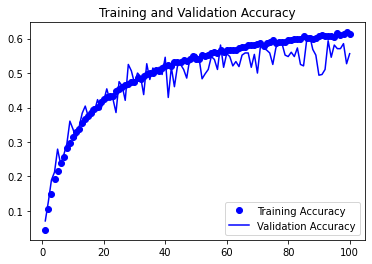

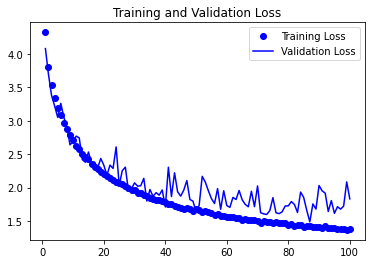

In [17]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()